# Robotics toolbox Interactive example using pyplot backend
![](https://github.com/petercorke/robotics-toolbox-python/raw/master/docs/figs/RobToolBox_RoundLogoB.png)


## Installing the necessary packages
Install `jupyter` to run this notebook
```
pip install jupyter
```
Install the robotics toolbox
```
pip install roboticstoolbox-python
```
If you still have not installed `pycapacity`, you can install it using
```
pip install pycapacity
```

For interactive visualisation
```
pip install ipywidgets
pip install ipympl
```


### Pyplot does not remove old polytopes
For the moment there is not an easy fix for this problem, it is the issue of the pycapacity library, we'll try to fix it in the next versions.

In [1]:
import roboticstoolbox as rp
import numpy as np

# polytope python module
import pycapacity.robot as pyc

# plotting the polytope using pycapacity
import matplotlib.pyplot as plt
from pycapacity.visual import * # pycapacity visualisation tools

%matplotlib widget

In [2]:
# funciton, calculating and visualising the polytope
def visualise_polytope(q, rob, axis):
    Jac = rob.jacob0(q)[:3,:]
    # gravity torque
    gravity = rob.gravload(q).reshape((-1,1))
    
    # calculate for the polytope
    f_poly =  pyc.force_polytope(Jac, t_max, t_min, gravity)
    
    # draw faces and vertices
    plot_polytope(plot=axis, 
              polytope=f_poly, 
              label='force polytope',
              edge_color='black', 
              alpha = 0.2, 
              show_vertices=False,
              center=rob.fkine(q).t,  # set the polytope center at the end effector position
              scale=1/500) # scale the polytope and place it to the end-effector

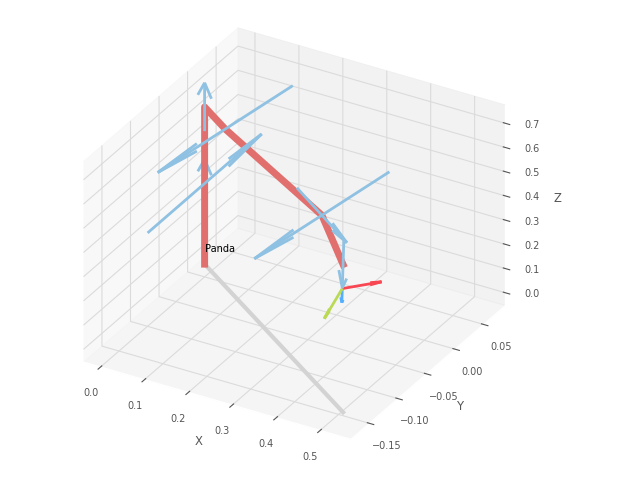

Visual: no faces found, calculating faces


(-1.0, 1.5)

In [3]:
robot = rp.models.DH.Panda()
# initial pose
q= np.array([0.00138894 ,5.98736e-05,-0.30259058,   -1.6, -6.64181e-05,    1.56995,-5.1812e-05])[:robot.n]
robot.q = q
# joint ranges
q_min,q_max = robot.qlim
# joint torque limits
t_max = np.array([87, 87, 87, 87, 20, 20, 20])[:robot.n]
t_min = -t_max

# visualise robot
fig = robot.plot(q)
ax = fig.ax

# visualise the initial polytope
visualise_polytope(q, robot, ax)

ax.set_xlim([-1, 1.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 1.5])

In [4]:
from ipywidgets import interact, FloatSlider
kwargs = {'q[{}]'.format(i) : 
          FloatSlider(
              min = q_min[i], 
              max = q_max[i], 
              step = 0.01, 
              value = q[i],
              continuous_update=False) 
          for i,q_1 in enumerate(q)}
@interact(**kwargs)
def update(**kwargs):
    q = np.array([v  for v in kwargs.values()])
    visualise_polytope(q,robot, fig.ax)
    robot.q = q
    fig.step()

interactive(children=(FloatSlider(value=0.00138894, continuous_update=False, description='q[0]', max=2.8973, m…